<a href="https://colab.research.google.com/github/alertjjm/Artificial-Intelligence/blob/master/5_2_using_convnets_with_small_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import keras

keras.__version__

'2.4.3'

In [6]:
import os, shutil

층들을 거치면서 특성 맵의 차원이 어떻게 변하는지 살펴보겠습니다:

In [7]:
from keras.preprocessing.image import ImageDataGenerator

validation_dir='test/'
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 0 images belonging to 0 classes.


In [8]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [10]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.load_weights("cats_and_dogs_small_1.h5")
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [16]:

import matplotlib.pyplot as plt
from keras.preprocessing import image
def predict_img(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = x.reshape((1,) + x.shape)
  pred=model.predict(x, batch_size=32, verbose=0)
  i=0
  for batch in datagen.flow(x, batch_size=1):
      plt.figure(i)
      imgplot = plt.imshow(image.array_to_img(batch[0]))
      i += 1
      if i % 1 == 0:
          break
  plt.show()
  if pred==0:
    print('cat')
  else:
    print('dog')


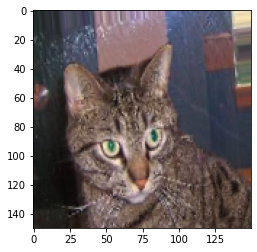

cat


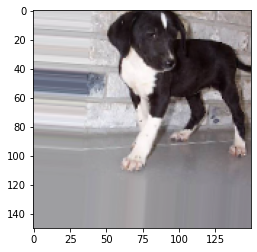

dog


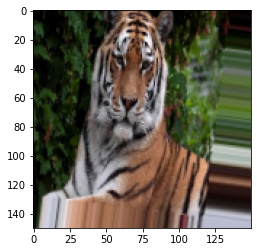

dog


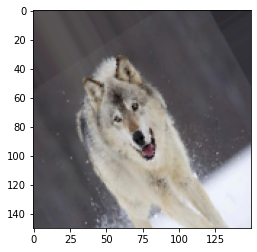

cat


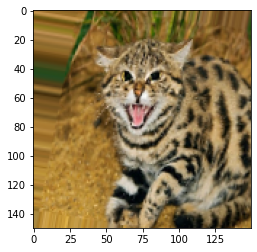

cat


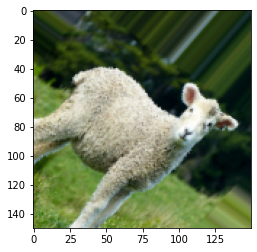

dog


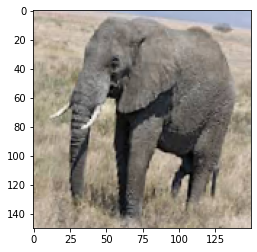

dog


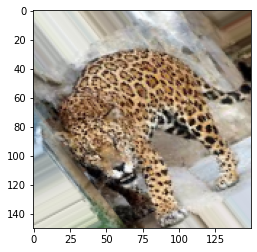

cat


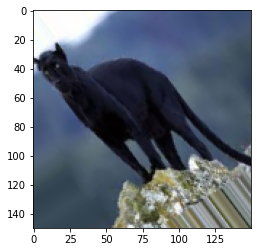

dog


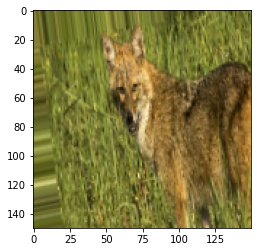

dog


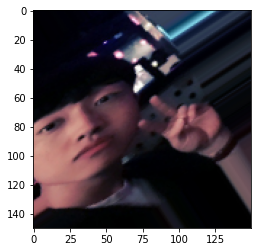

cat


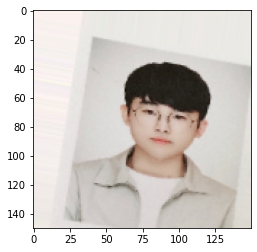

dog


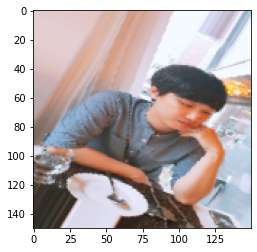

cat


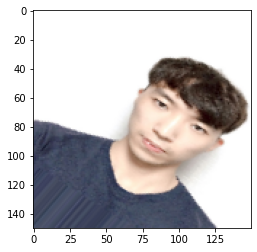

cat


In [20]:
img_path = ['test/cat.1.jpg','test/dog.1123.jpg','test/tiger.jpg','test/wolf.jpg','test/5.jpg','test/6.jpg','test/7.jpg','test/8.jpg','test/9.jpg','test/10.jpg','test/1.jpg','test/2.jpg','test/3.jpg','test/4.jpg']
for i in img_path:
  predict_img(i)